Our code is from: https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

# Airline analysis

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Project4/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## All Data (START HERE) 

Loading the data 

In [ ]:
dtype_dict = {'OP_CARRIER_FL_NUM': np.uint16,'DEP_TIME': np.uint16, 'DEP_DELAY': np.int16, 'TAXI_OUT': np.uint8, 
              'WHEELS_OFF': np.uint16, 'WHEELS_ON': np.uint16, 'TAXI_IN': np.uint8, 'ARR_TIME': np.uint16, 
              'ARR_DELAY': np.int16,'AIR_TIME': np.uint16, 'DISTANCE': np.uint16, 'DEP_DELAY_Y/N': np.uint8,
              'ARR_DElAY_Y/N': np.uint8, 'YEAR': np.uint16, 'MONTH': np.uint8, 'DAY_OF_MONTH': np.uint8}

df = pd.read_csv(drive_dir + 'Data/all_years.csv', dtype=dtype_dict)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,12,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dtype_dict = {'OP_CARRIER_FL_NUM': np.uint16,'DEP_TIME': np.uint16, 'DEP_DELAY': np.int16, 'TAXI_OUT': np.uint8, 
              'WHEELS_OFF': np.uint16, 'WHEELS_ON': np.uint16, 'TAXI_IN': np.uint8, 'ARR_TIME': np.uint16, 
              'ARR_DELAY': np.int16,'AIR_TIME': np.uint16, 'DISTANCE': np.uint16, 'DEP_DELAY_Y/N': np.uint8,
              'ARR_DElAY_Y/N': np.uint8, 'YEAR': np.uint16, 'MONTH': np.uint8, 'DAY_OF_MONTH': np.uint8}

df_sample = pd.read_csv(drive_dir + 'Data/all_years.csv', dtype=dtype_dict).sample(80000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,12,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preparing the data

#### Assigning numbers to columns with data type 'Obect'

In [ ]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DEP_DELAY_Y/N,ARR_DELAY_Y/N,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME_OF_DAY,AIRLINE_NAME
0,2009-01-06,DL,1192,ANC,SLC,100,233,93,10,243,810,7,735,817,42,0,0,275,224,207,2125,1,1,2009,1,6,Tuesday,night,Delta Airlines
1,2009-01-30,MQ,3692,GRR,DFW,1535,1557,22,12,1609,1714,7,1735,1721,-14,0,0,180,144,125,931,1,0,2009,1,30,Friday,afternoon,Envoy Air
2,2009-01-01,9E,2267,MEM,XNA,935,930,-5,15,945,1031,4,1052,1035,-17,0,0,77,65,46,258,0,0,2009,1,1,Thursday,morning,Endeavor Air
3,2009-01-02,DL,842,ATL,EWR,1340,1536,116,36,1612,1831,7,1600,1838,158,0,0,140,182,139,745,1,1,2009,1,2,Friday,afternoon,Delta Airlines
4,2009-01-01,EV,4985,JAX,CVG,1630,1623,-7,9,1632,1804,6,1831,1810,-21,0,0,121,107,92,614,0,0,2009,1,1,Thursday,afternoon,ExpressJet


In [ ]:
day_of_weekDict = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_of_weekDict)
df_sample['DAY_OF_WEEK'] = df_sample['DAY_OF_WEEK'].map(day_of_weekDict)

In [ ]:
timeOfDayDict = {'morning': 1, 'afternoon': 2, 'evening': 3, 'night': 4}

df['TIME_OF_DAY'] = df['TIME_OF_DAY'].map(timeOfDayDict)
df_sample['TIME_OF_DAY'] = df_sample['TIME_OF_DAY'].map(timeOfDayDict)

#### Adding a new `OP_CARRIER` to the `AIRLINE_NAME` column

In [ ]:
df['OP_CARRIER'].unique()

array(['DL', 'MQ', '9E', 'EV', 'WN', 'AA', 'YV', 'B6', 'UA', 'OO', 'NW',
       'OH', 'XE', 'US', 'CO', 'AS', 'F9', 'FL', 'HA', 'VX', 'NK', 'YX',
       'G4'], dtype=object)

In [ ]:
airlineName_dict = {'UA':'United Airlines','AS':'Alaska Airlines','9E':'Endeavor Air','B6':'JetBlue Airways','EV':'ExpressJet',
    'F9':'Frontier Airlines','G4':'Allegiant Air','HA':'Hawaiian Airlines','MQ':'Envoy Air','NK':'Spirit Airlines','OH':'PSA Airlines',
    'OO':'SkyWest Airlines','VX':'Virgin America','WN':'Southwest Airlines','YV':'Mesa Airline','YX':'Republic Airways','AA':'American Airlines',
    'DL':'Delta Airlines', 'XE': 'Delux Public Charter LLC dba JSX Air', 'FL': 'Air Large European Aviation Project Air Leap', 
    'US': 'Puerto Rico International Airlines Inc.', 'NW': 'Northwest Airlines','CO': 'North-Western Cargo International Airlines Co., Ltd.'}

df['AIRLINE_NAME'] = df['OP_CARRIER'].map(airlineName_dict)
df_sample['AIRLINE_NAME'] = df_sample['OP_CARRIER'].map(airlineName_dict)

In [ ]:
df['AIRLINE_NAME'].unique()

array(['Delta Airlines', 'Envoy Air', 'Endeavor Air', 'ExpressJet',
       'Southwest Airlines', 'American Airlines', 'Mesa Airline',
       'JetBlue Airways', 'United Airlines', 'SkyWest Airlines',
       'Northwest Airlines', 'PSA Airlines',
       'Delux Public Charter LLC dba JSX Air',
       'Puerto Rico International Airlines Inc.',
       'North-Western Cargo International Airlines Co., Ltd.',
       'Alaska Airlines', 'Frontier Airlines',
       'Air Large European Aviation Project Air Leap',
       'Hawaiian Airlines', 'Virgin America', 'Spirit Airlines',
       'Republic Airways', 'Allegiant Air'], dtype=object)

In [ ]:
df['AIRLINE_NAME'].isna().sum()

0

In [ ]:
carrierCode_dict = {'UA': 1,'AS': 2,'9E': 3,'B6': 4,'EV': 5,
    'F9': 6,'G4': 7,'HA': 8,'MQ':9,'NK': 10,'OH': 11,
    'OO':12,'VX': 13,'WN':14,'YV':15,'YX':16,'AA':17,
    'DL':18, 'XE': 19, 'FL': 20, 
    'US': 21, 'NW': 22, 'CO': 23}

df['OP_CARRIER'] = df['OP_CARRIER'].map(carrierCode_dict)
df_sample['OP_CARRIER'] = df_sample['OP_CARRIER'].map(carrierCode_dict)

In [ ]:
airlineName_dict2 = {'United Airlines':1, 'Alaska Airlines':2,'Endeavor Air':3,'JetBlue Airways':4,'ExpressJet':5,
    'Frontier Airlines': 6,'Allegiant Air': 7,'Hawaiian Airlines':8,'Envoy Air':9,'Spirit Airlines': 10,'PSA Airlines': 11,
    'SkyWest Airlines': 12,'Virgin America': 13,'Southwest Airlines': 14,'Mesa Airline': 15,'Republic Airways': 16,'American Airlines': 17,
    'Delta Airlines': 18, 'Delux Public Charter LLC dba JSX Air': 19, 'Air Large European Aviation Project Air Leap': 20, 
    'Puerto Rico International Airlines Inc.': 21, 'Northwest Airlines': 22,'North-Western Cargo International Airlines Co., Ltd.': 23}

df['AIRLINE_NAME'] = df['AIRLINE_NAME'].map(airlineName_dict2)
df_sample['AIRLINE_NAME'] = df_sample['AIRLINE_NAME'].map(airlineName_dict2)

In [ ]:
df.dtypes

FL_DATE                object
OP_CARRIER              int64
OP_CARRIER_FL_NUM      uint16
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           object
DEP_TIME               uint16
DEP_DELAY               int16
TAXI_OUT                uint8
WHEELS_OFF             uint16
WHEELS_ON              uint16
TAXI_IN                 uint8
CRS_ARR_TIME           object
ARR_TIME               uint16
ARR_DELAY               int16
CANCELLED              object
DIVERTED               object
CRS_ELAPSED_TIME       object
ACTUAL_ELAPSED_TIME    object
AIR_TIME               uint16
DISTANCE               uint16
DEP_DELAY_Y/N           uint8
ARR_DELAY_Y/N           int64
YEAR                   uint16
MONTH                   uint8
DAY_OF_MONTH            uint8
DAY_OF_WEEK             int64
TIME_OF_DAY             int64
AIRLINE_NAME            int64
dtype: object

Dropping the columns we don't need

In [ ]:
df = df.drop(['CANCELLED', 'DIVERTED'], axis='columns')
df_sample = df_sample.drop(['CANCELLED', 'DIVERTED'], axis='columns')

In [ ]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DEP_DELAY_Y/N', 'ARR_DELAY_Y/N', 'YEAR', 'MONTH', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'TIME_OF_DAY', 'AIRLINE_NAME'],
      dtype='object')

#### Changing the datatypes for the encoded columns as necessary

In [ ]:
df['OP_CARRIER'] = df['OP_CARRIER'].astype(np.uint8)
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype(np.uint8)
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype(np.uint8)
df['AIRLINE_NAME'] = df['AIRLINE_NAME'].astype(np.uint8)

df_sample['OP_CARRIER'] = df_sample['OP_CARRIER'].astype(np.uint8)
df_sample['DAY_OF_WEEK'] = df_sample['DAY_OF_WEEK'].astype(np.uint8)
df_sample['TIME_OF_DAY'] = df_sample['TIME_OF_DAY'].astype(np.uint8)
df_sample['AIRLINE_NAME'] = df_sample['AIRLINE_NAME'].astype(np.uint8)

In [ ]:
df.dtypes

FL_DATE                object
OP_CARRIER              uint8
OP_CARRIER_FL_NUM      uint16
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           object
DEP_TIME               uint16
DEP_DELAY               int16
TAXI_OUT                uint8
WHEELS_OFF             uint16
WHEELS_ON              uint16
TAXI_IN                 uint8
CRS_ARR_TIME           object
ARR_TIME               uint16
ARR_DELAY               int16
CRS_ELAPSED_TIME       object
ACTUAL_ELAPSED_TIME    object
AIR_TIME               uint16
DISTANCE               uint16
DEP_DELAY_Y/N           uint8
ARR_DELAY_Y/N           int64
YEAR                   uint16
MONTH                   uint8
DAY_OF_MONTH            uint8
DAY_OF_WEEK             uint8
TIME_OF_DAY             uint8
AIRLINE_NAME            uint8
dtype: object

In [ ]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DEP_DELAY_Y/N,ARR_DELAY_Y/N,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME_OF_DAY,AIRLINE_NAME
0,2009-01-06,18,1192,ANC,SLC,100,233,93,10,243,810,7,735,817,42,275,224,207,2125,1,1,2009,1,6,2,4,18
1,2009-01-30,9,3692,GRR,DFW,1535,1557,22,12,1609,1714,7,1735,1721,-14,180,144,125,931,1,0,2009,1,30,5,2,9
2,2009-01-01,3,2267,MEM,XNA,935,930,-5,15,945,1031,4,1052,1035,-17,77,65,46,258,0,0,2009,1,1,4,1,3
3,2009-01-02,18,842,ATL,EWR,1340,1536,116,36,1612,1831,7,1600,1838,158,140,182,139,745,1,1,2009,1,2,5,2,18
4,2009-01-01,5,4985,JAX,CVG,1630,1623,-7,9,1632,1804,6,1831,1810,-21,121,107,92,614,0,0,2009,1,1,4,2,5


In [ ]:
df['CRS_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME'].replace(['Unknown'], '0')
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].replace(['Unknown'], '0')
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].replace(['Unknown'], '0')
df['ACTUAL_ELAPSED_TIME'] = df['ACTUAL_ELAPSED_TIME'].replace(['Unknown'], '0')

df_sample['CRS_ELAPSED_TIME'] = df_sample['CRS_ELAPSED_TIME'].replace(['Unknown'], '0')
df_sample['CRS_DEP_TIME'] = df_sample['CRS_DEP_TIME'].replace(['Unknown'], '0')
df_sample['CRS_ARR_TIME'] = df_sample['CRS_ARR_TIME'].replace(['Unknown'], '0')
df_sample['ACTUAL_ELAPSED_TIME'] = df_sample['ACTUAL_ELAPSED_TIME'].replace(['Unknown'], '0')

In [ ]:
df['CRS_ELAPSED_TIME'] = pd.to_numeric(df['CRS_ELAPSED_TIME'])
df['CRS_DEP_TIME'] = pd.to_numeric(df['CRS_DEP_TIME'])
df['CRS_ARR_TIME'] = pd.to_numeric(df['CRS_ARR_TIME'])
df['ACTUAL_ELAPSED_TIME'] = pd.to_numeric(df['ACTUAL_ELAPSED_TIME'])

df_sample['CRS_ELAPSED_TIME'] = pd.to_numeric(df_sample['CRS_ELAPSED_TIME'])
df_sample['CRS_DEP_TIME'] = pd.to_numeric(df_sample['CRS_DEP_TIME'])
df_sample['CRS_ARR_TIME'] = pd.to_numeric(df_sample['CRS_ARR_TIME'])
df_sample['ACTUAL_ELAPSED_TIME'] = pd.to_numeric(df_sample['ACTUAL_ELAPSED_TIME'])

In [ ]:
df['CRS_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME'].astype(int)
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(int)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].astype(int)
df['ACTUAL_ELAPSED_TIME'] = df['ACTUAL_ELAPSED_TIME'].astype(int)

df_sample['CRS_ELAPSED_TIME'] = df_sample['CRS_ELAPSED_TIME'].astype(int)
df_sample['CRS_DEP_TIME'] = df_sample['CRS_DEP_TIME'].astype(int)
df_sample['CRS_ARR_TIME'] = df_sample['CRS_ARR_TIME'].astype(int)
df_sample['ACTUAL_ELAPSED_TIME'] = df_sample['ACTUAL_ELAPSED_TIME'].astype(int)

In [ ]:
df.dtypes

FL_DATE                object
OP_CARRIER              uint8
OP_CARRIER_FL_NUM      uint16
ORIGIN                 object
DEST                   object
CRS_DEP_TIME            int64
DEP_TIME               uint16
DEP_DELAY               int16
TAXI_OUT                uint8
WHEELS_OFF             uint16
WHEELS_ON              uint16
TAXI_IN                 uint8
CRS_ARR_TIME            int64
ARR_TIME               uint16
ARR_DELAY               int16
CRS_ELAPSED_TIME        int64
ACTUAL_ELAPSED_TIME     int64
AIR_TIME               uint16
DISTANCE               uint16
DEP_DELAY_Y/N           uint8
ARR_DELAY_Y/N           int64
YEAR                   uint16
MONTH                   uint8
DAY_OF_MONTH            uint8
DAY_OF_WEEK             uint8
TIME_OF_DAY             uint8
AIRLINE_NAME            uint8
dtype: object

### Train, Test, Split

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Assigning and encoding the data frame for easier use

In [ ]:
df_encoded2 = df #the big data set

In [ ]:
df_encoded = df_sample

In [ ]:
for col in df_encoded2.columns:
  if col != 'DEP_DELAY': 
    if df_encoded2[col].dtype == object:  
        try:  
            le = LabelEncoder()           
            le.fit(df_encoded2[col].unique())    
            df_encoded2[col] = le.transform(df_encoded2[col])  
        except Exception as e:         
            print(col)         
            print(e)

In [ ]:
for col in df_encoded.columns:
  if col != 'DEP_DELAY': 
    if df_encoded[col].dtype == object:  
        try:  
            le = LabelEncoder()           
            le.fit(df_encoded[col].unique())    
            df_encoded[col] = le.transform(df_encoded[col])  
        except Exception as e:         
            print(col)         
            print(e)

In [ ]:
df_encoded.head(3)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DEP_DELAY_Y/N,ARR_DELAY_Y/N,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME_OF_DAY,AIRLINE_NAME
59259,246,5,5314,21,94,1640,1636,-4,19,1655,1626,2,1639,1628,-11,59,52,31,171,0,0,2009,9,4,5,2,5
751815,3285,11,5591,75,12,2025,2021,-4,12,2033,2106,4,2118,2110,-8,53,49,33,140,0,0,2018,3,2,5,3,11
834336,3628,14,1255,158,195,0,634,-1,17,651,1034,14,0,1048,-7,0,0,163,1428,0,0,2019,2,8,5,1,14


In [ ]:
y = df_encoded.DEP_DELAY
X = df_encoded.drop(['DEP_DELAY', 'DEP_TIME', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'DEP_DELAY_Y/N', 'ARR_DELAY_Y/N'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
y2 = df_encoded2.DEP_DELAY # for the big data set
X2 = df_encoded2.drop(['DEP_DELAY', 'DEP_TIME', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'DEP_DELAY_Y/N', 'ARR_DELAY_Y/N'], axis=1)
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

Saving the training and testing set into drive

In [ ]:
# train_X.to_csv(drive_dir + 'Data/train_X.csv', index=False)
# train_y.to_csv(drive_dir + 'Data/train_y.csv', index=False)
# test_X.to_csv(drive_dir + 'Data/test_X.csv', index=False)
# test_y.to_csv(drive_dir + 'Data/test_y.csv', index=False)

In [ ]:
# train_X2.to_csv(drive_dir + 'Data/train_X_all.csv', index=False) # for the biggest data set
# train_y2.to_csv(drive_dir + 'Data/train_y_all.csv', index=False)
# test_X2.to_csv(drive_dir + 'Data/test_X_all.csv', index=False)
# test_y2.to_csv(drive_dir + 'Data/test_y_all.csv', index=False)

In [ ]:
X_train = pd.read_csv(drive_dir + 'Data/train_X.csv')
y_train = pd.read_csv(drive_dir + 'Data/train_y.csv')
X_test = pd.read_csv(drive_dir + 'Data/test_X.csv')
y_test = pd.read_csv(drive_dir + 'Data/test_y.csv')

# Decision Tree Model

Using all columns for first model 

In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=5)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = dt_regressor.predict(X_test)
y_pred

array([ 4.48635498, 11.78797621, 11.78797621, ...,  9.07405141,
        6.55031447,  4.48635498])

In [ ]:
r2_score(y_test, y_pred)

0.30453583602171996

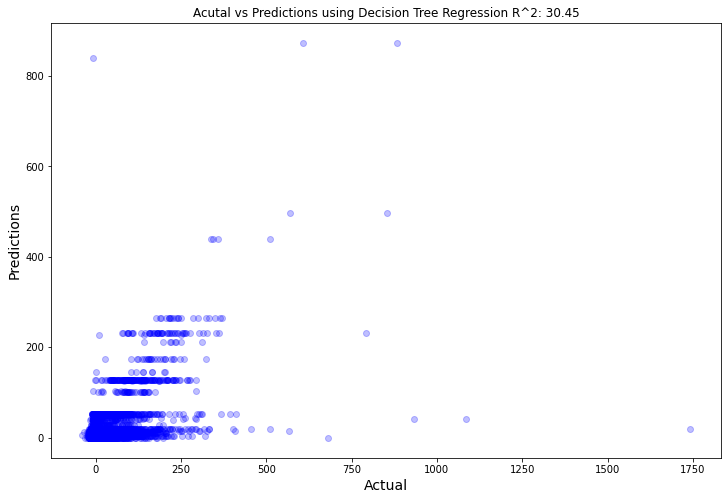

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=y_test,y=y_pred, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using Decision Tree Regression R^2: {r2_score(y_test, y_pred)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

In [ ]:
featuredf = pd.DataFrame(dt_regressor.feature_importances_, X_train.columns) 
featuredf = featuredf.sort_values(by=0, ascending=False)

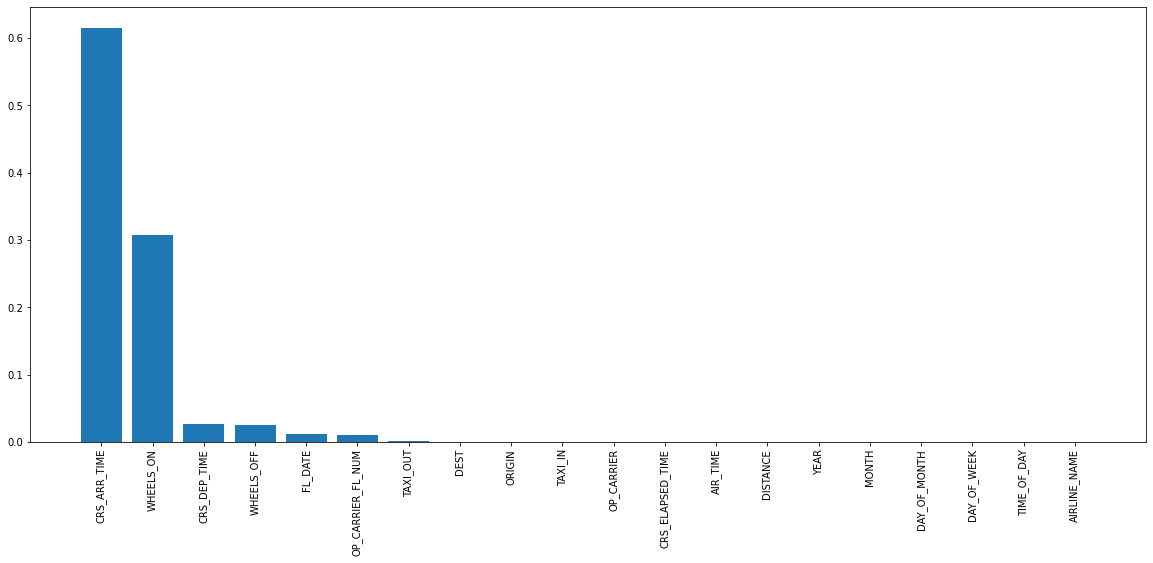

In [ ]:
plt.figure(figsize=(20, 8))

x = featuredf.index
y = featuredf[0]

plt.bar(x, y)
plt.xticks(rotation=90);

### Hyperparameter Tunning

In [ ]:
param_grid = {'min_samples_split': [2, 10, 20, 40, 100],
              'max_depth': [3, 10, 25, 50],
              'min_samples_leaf':[2, 10, 50, 100],
              'max_leaf_nodes': [5, 20, 100]}

In [ ]:
dt_regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(dt_regressor, param_grid, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 10, 25, 50],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf

In [ ]:
grid_search.best_params_

{'max_depth': 50,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 2,
 'min_samples_split': 40}

In [ ]:
dtr_model1 = DecisionTreeRegressor(max_depth=40, max_leaf_nodes=215, min_samples_leaf=4, min_samples_split=38)
dtr_model1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=40,
                      max_features=None, max_leaf_nodes=215,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=38,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred2 = dtr_model1.predict(X_test)
y_pred2

array([-0.70706598, -1.21766169, -1.17788462, ..., -1.94652015,
        6.55031447,  0.03686882])

In [ ]:
r2_score(y_test, y_pred2)

0.6163233187839409

#####More Hyperparameter tunning to see if there is improvement

In [ ]:
param_grid = {'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'max_depth': [28, 30 , 32, 33, 35, 40, 45, 48, 50 , 60, 70],
              'min_samples_leaf':[1, 2, 3, 4, 5, 7, 10, 11],
              'max_leaf_nodes': [180, 190, 200, 210, 220, 230, 240, 280, 300]}

In [ ]:
dt_regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(dt_regressor, param_grid, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [28, 30, 32, 33, 35, 40, 45, 48, 50, 60,
                                       70],
                         'max_l

In [ ]:
grid_search.best_params_

{'max_depth': 28,
 'max_leaf_nodes': 300,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

Retraining with new hyper parameters

In [ ]:
dtr_model2 = DecisionTreeRegressor(max_depth=28, max_leaf_nodes=298, min_samples_leaf=7, min_samples_split=2)
dtr_model2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=28,
                      max_features=None, max_leaf_nodes=298,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred3 = dtr_model2.predict(X_test)
y_pred3

array([-0.70706598, -1.21766169, -1.17788462, ..., -1.94652015,
       24.59701493, -1.13456257])

In [ ]:
r2_score(y_test, y_pred3)

0.6115567908625693

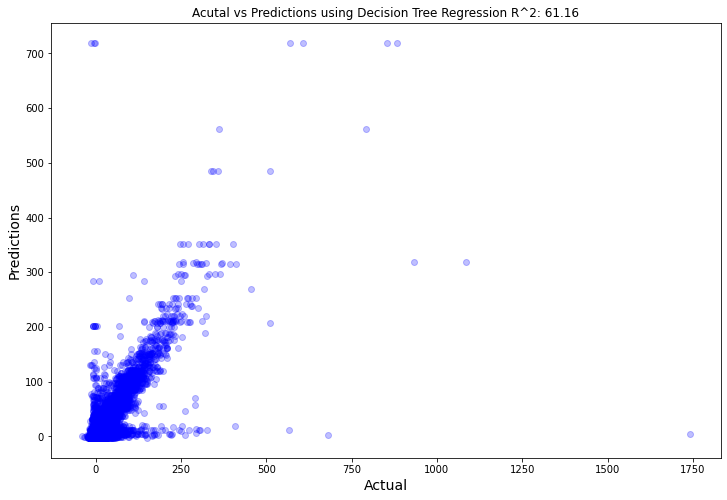

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=y_test,y=y_pred3, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using Decision Tree Regression R^2: {r2_score(y_test, y_pred3)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

In [ ]:
featuredf = pd.DataFrame(dtr_model2.feature_importances_, X_train.columns) 
featuredf = featuredf.sort_values(by=0, ascending=False)

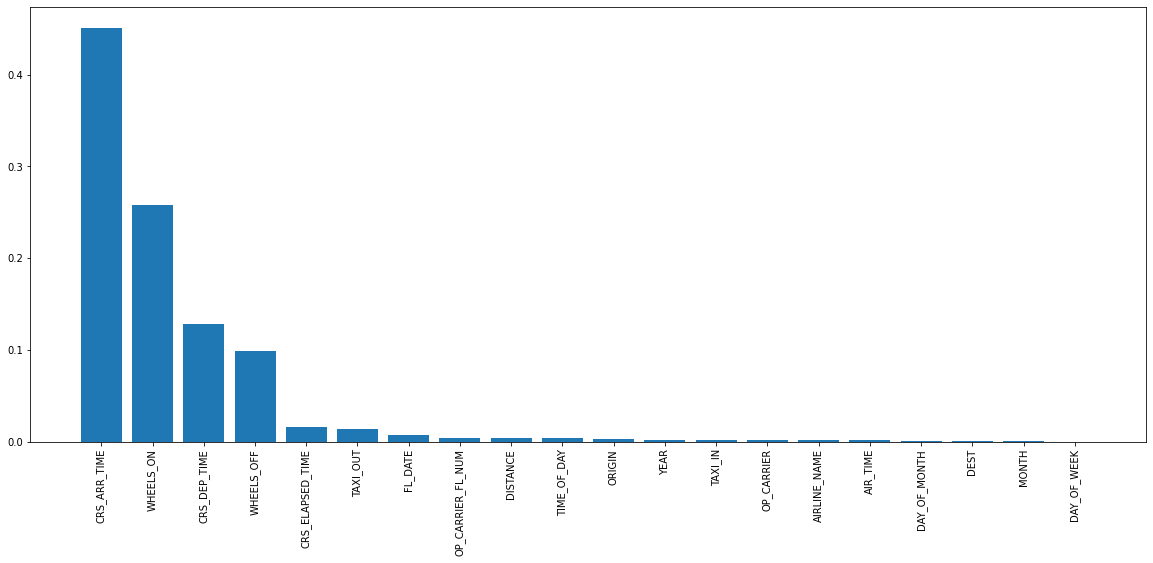

In [ ]:
plt.figure(figsize=(20, 8))

x = featuredf.index
y = featuredf[0]

plt.bar(x, y)
plt.xticks(rotation=90);

### Using top 10 important columns

In [ ]:
cols_to_use = ['CRS_ARR_TIME', 'WHEELS_ON', 'CRS_DEP_TIME', 'WHEELS_OFF', 'CRS_ELAPSED_TIME', 'TAXI_OUT', 'FL_DATE', 'OP_CARRIER_FL_NUM', 'DISTANCE', 'TIME_OF_DAY']

In [ ]:
y2 = df_encoded.DEP_DELAY
X2 = df_encoded[cols_to_use]
train_X, test_X, train_y, test_y = train_test_split(X2, y2, test_size=0.3, random_state=123)

In [ ]:
dtr_model3 = DecisionTreeRegressor(max_depth=28, max_leaf_nodes=300, min_samples_leaf=7, min_samples_split=2)
dtr_model3.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=28,
                      max_features=None, max_leaf_nodes=300,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred4 = dtr_model2.predict(X_test)
y_pred4

array([-0.70706598, -1.21766169, -1.17788462, ..., -1.94652015,
       24.59701493, -1.13456257])

In [ ]:
r2_score(y_test, y_pred4)

0.6115567908625693

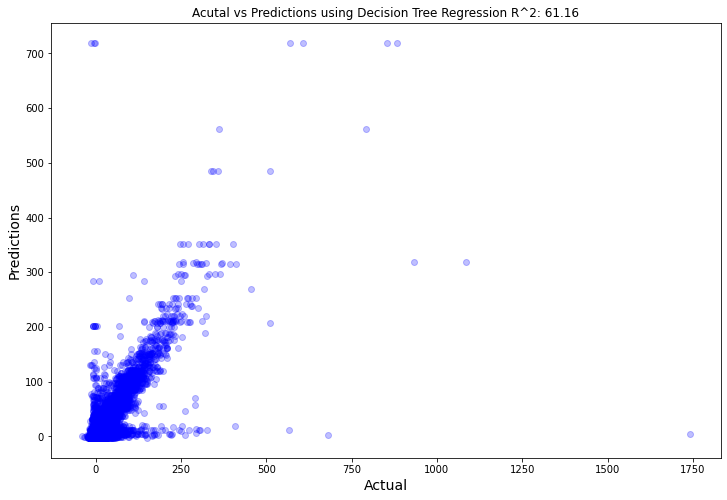

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=y_test,y=y_pred4, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using Decision Tree Regression R^2: {r2_score(y_test, y_pred4)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

# XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

First using a default model that uses all columns and default parameters

In [ ]:
xgbr_defaultMod = xgb.XGBRegressor()
xgbr_defaultMod.fit(X_train, y_train)
print(xgbr_defaultMod)

[23:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
score = xgbr_defaultMod.score(X_train, y_train)  
print(f'Training score: {(score*100):.3f}')

Training score: 60.060


In [ ]:
# - cross validataion 
scores = cross_val_score(xgbr_defaultMod, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[23:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 0.57


Checking important features on all columns

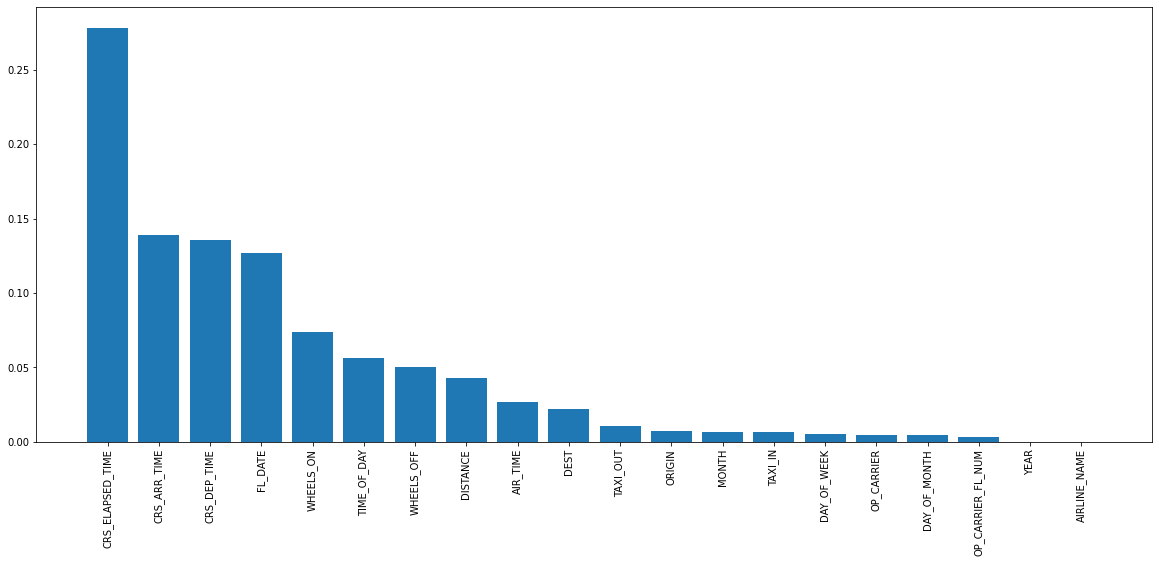

In [ ]:
featuredf = pd.DataFrame(xgbr_defaultMod.feature_importances_, X_train.columns) 
featuredf = featuredf.sort_values(by=0, ascending=False)

plt.figure(figsize=(20, 8))

x = featuredf.index
y = featuredf[0]

plt.bar(x, y)
plt.xticks(rotation=90);

In [ ]:
pred = xgbr_defaultMod.predict(X_test)
pred

array([ 9.679326 ,  8.345885 ,  2.2146392, ..., -1.6574173, 13.565865 ,
        3.569304 ], dtype=float32)

In [ ]:
f'MSE: {mean_squared_error(test_y, pred)}'

'MSE: 1738.36669921875'

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 26.360902


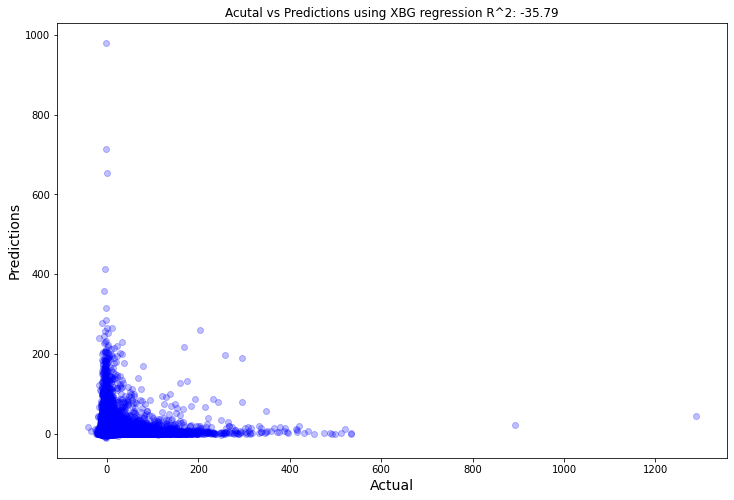

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y,y=pred, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using XBG regression R^2: {r2_score(test_y, pred)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

#### Changing the columns to use for model

In [ ]:
cols_to_use = ['FL_DATE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','TIME_OF_DAY', 'AIRLINE_NAME']
y3 = df_encoded.DEP_DELAY
X3 = df_encoded[cols_to_use]
train_X3, test_X3, train_y3, test_y3 = train_test_split(X3, y3, test_size=0.3, random_state=123)

Using default parameters

In [ ]:
xgbr_model1 = xgb.XGBRegressor()
train_model1 = xgbr_model1.fit(train_X3, train_y3)

[23:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_preds = train_model1.predict(test_X3)
mean_squared_error(test_y3, y_preds)

521.55316

In [ ]:
rmse = np.sqrt(mean_squared_error(test_y3, y_preds))
print("RMSE: %f" % (rmse))

RMSE: 22.837538


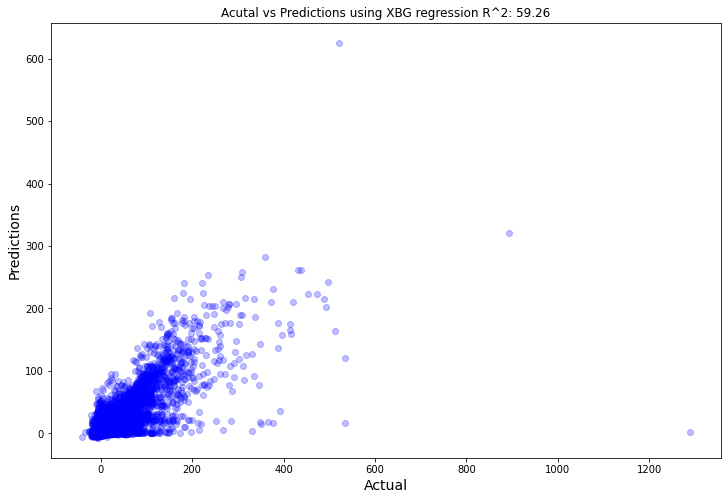

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y3,y=y_preds, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using XBG regression R^2: {r2_score(test_y3, y_preds)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

Checking important features for these columns

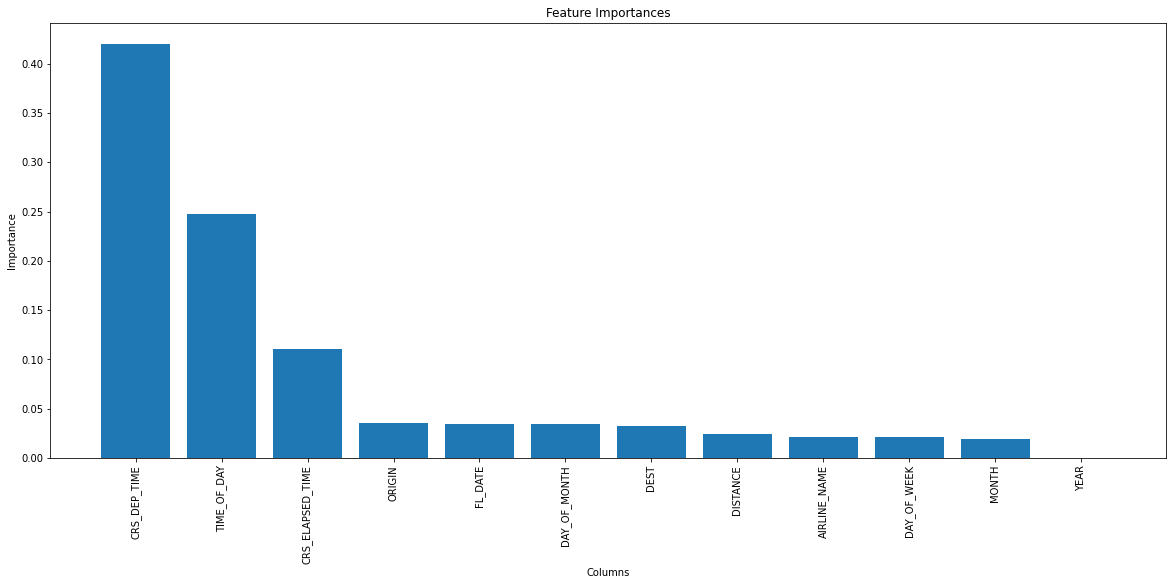

In [ ]:
featuredf = pd.DataFrame(train_model1.feature_importances_, train_X3.columns) 
featuredf = featuredf.sort_values(by=0, ascending=False)

plt.figure(figsize=(20, 8))

x = featuredf.index
y = featuredf[0]

plt.bar(x, y)
plt.xlabel('Columns')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Model Features')

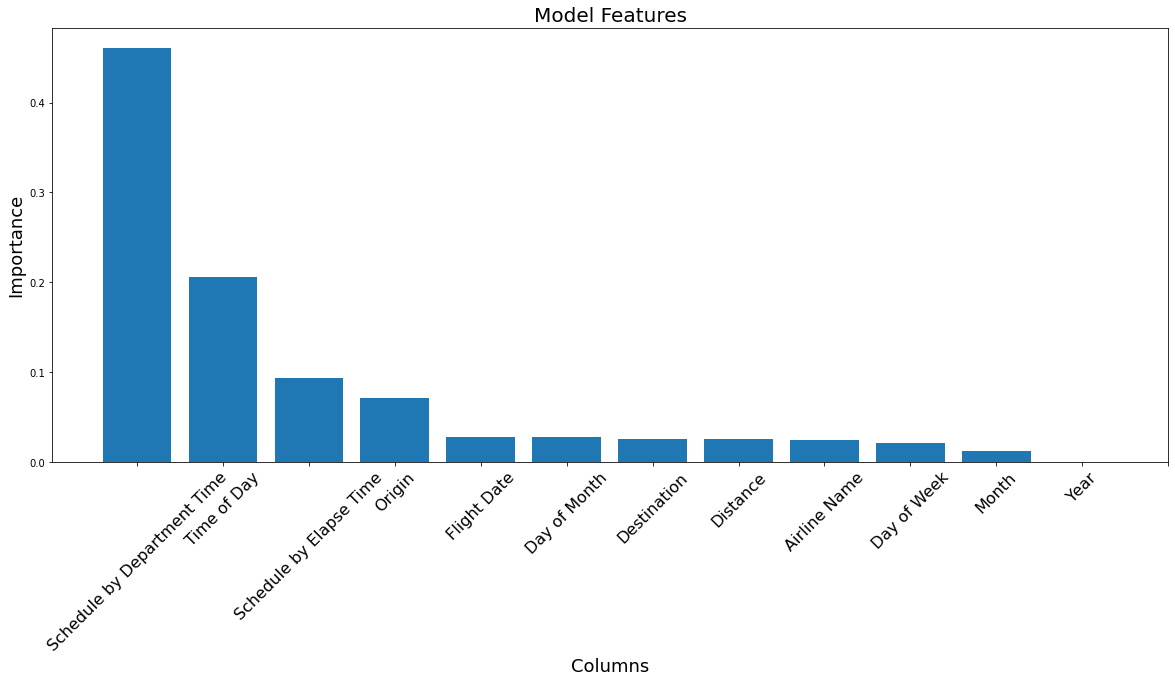

In [ ]:
featuredf = pd.DataFrame(train_model1.feature_importances_, train_X3.columns) 
featuredf = featuredf.sort_values(by=0, ascending=False)

plt.figure(figsize=(20, 8))

x = featuredf.index
y = featuredf[0]

plt.bar(x, y)
plt.xticks(rotation=90);

plt.ylabel('Importance', fontsize =18)
plt.xlabel('Columns', fontsize =18)
plt.title('Model Features', fontsize =20);
plt.xticks(rotation=45, fontsize=18);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['Scheduled Departure Time', 'Time of Day', 'Scheduled Elapsed Time','Origin','Flight Date', 'Day of Month','Destination','Distance','Airline Name', 'Day of Week', 'Month', 'Year'], fontsize =16)

plt.ylabel('Importance', fontsize =18)
plt.title('Model Features', fontsize =20)

####Using parameters to retrain 

In [ ]:
xgbr_model2 = xgb.XGBRegressor(objective='reg:linear', max_depth=5, n_estimators=150, verbosity=0, n_jobs=-1, learning_rate=0.07)
train_model2 = xgbr_model2.fit(train_X3, train_y3)

In [ ]:
y_preds2 = train_model2.predict(test_X3)
mean_squared_error(test_y3, y_preds2)

290.71945

In [ ]:
rmse = np.sqrt(mean_squared_error(test_y3, y_preds2))
print("RMSE: %f" % (rmse))

RMSE: 17.050497


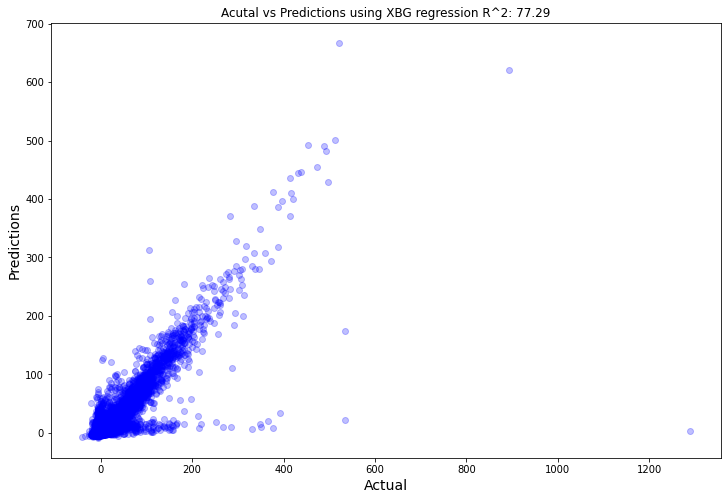

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y3,y=y_preds2, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using XBG regression R^2: {r2_score(test_y3, y_preds2)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

### Trying new Hyperparameters to see if model improves

In [ ]:
xgbr_model5 = xgb.XGBRegressor(objective='reg:linear', max_depth=5, n_estimators=305, verbosity=0, n_jobs=-1, learning_rate=0.09, min_child_weight=4, colsample_bytree=0.8)
train_model5 = xgbr_model5.fit(train_X3, train_y3)

In [ ]:
y_preds5 = train_model5.predict(test_X3)
mean_squared_error(test_y3, y_preds5)

271.67566

In [ ]:
rmse = np.sqrt(mean_squared_error(test_y3, y_preds5))
print("RMSE: %f" % (rmse))

RMSE: 16.482586


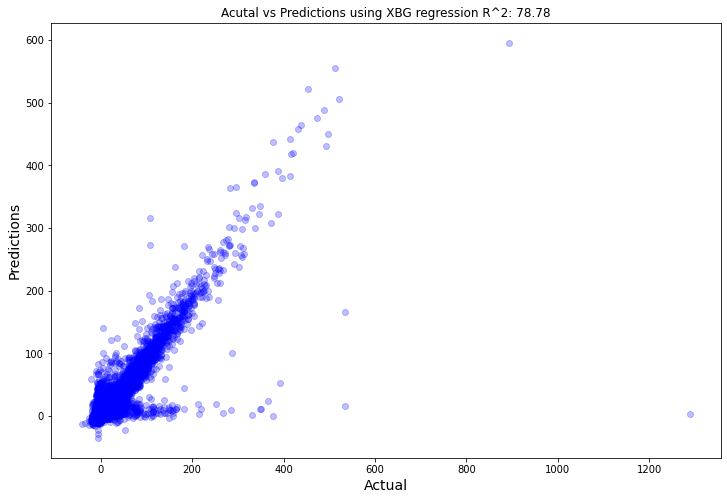

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y3,y=y_preds5, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using XBG regression R^2: {r2_score(test_y3, y_preds5)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

More tunning

In [ ]:
xgbr_model6 = xgb.XGBRegressor(objective='reg:linear', max_depth=5, n_estimators=300, verbosity=0, n_jobs=-1, learning_rate=0.09, min_child_weight=4)
train_model6 = xgbr_model6.fit(train_X3, train_y3)

In [ ]:
y_preds6 = train_model6.predict(test_X3)
mean_squared_error(test_y3, y_preds6)

269.27975

In [ ]:
rmse = np.sqrt(mean_squared_error(test_y3, y_preds6))
print("RMSE: %f" % (rmse))

RMSE: 16.409746


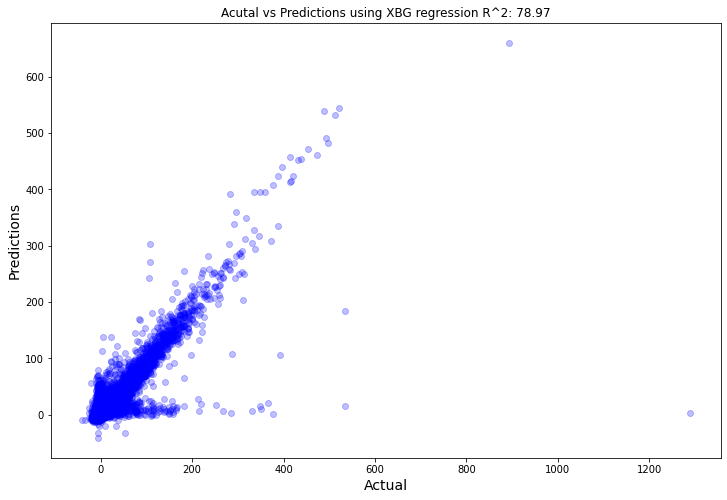

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y3,y=y_preds6, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using XBG regression R^2: {r2_score(test_y3, y_preds6)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);

###Applying it to the big data set

In [ ]:
X_train = pd.read_csv(drive_dir + 'Data/train_X_all.csv')
y_train = pd.read_csv(drive_dir + 'Data/train_y_all.csv')
X_test = pd.read_csv(drive_dir + 'Data/test_X_all.csv')
y_test = pd.read_csv(drive_dir + 'Data/test_y_all.csv')

In [ ]:
cols_to_use = ['FL_DATE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','TIME_OF_DAY', 'AIRLINE_NAME']
y2 = df_encoded2.DEP_DELAY
X2 = df_encoded2[cols_to_use]
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

In [ ]:
xgbr_model6 = xgb.XGBRegressor(objective='reg:linear', max_depth=5, n_estimators=305, verbosity=0, n_jobs=-1, learning_rate=0.09, min_child_weight=4, colsample_bytree=0.7)
train_model6 = xgbr_model6.fit(train_X2, train_y2)

In [ ]:
y_preds6 = train_model6.predict(test_X2)
mean_squared_error(test_y2, y_preds6)

275.22385

In [ ]:
rmse = np.sqrt(mean_squared_error(test_y2, y_preds6))
print("RMSE: %f" % (rmse))

RMSE: 16.589872


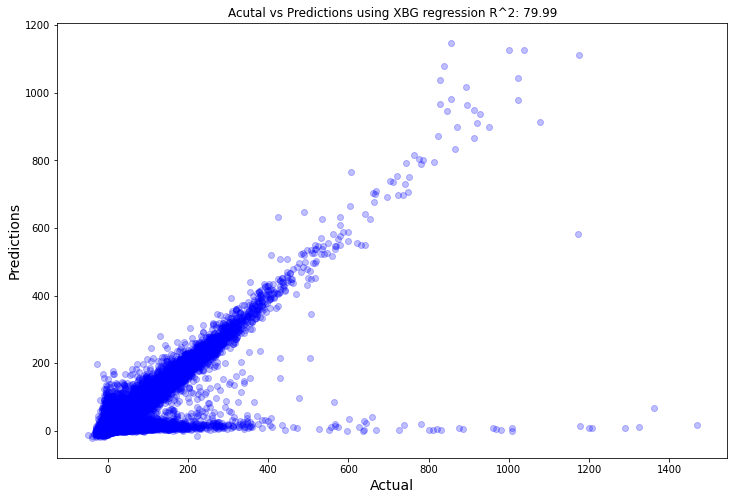

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y2,y=y_preds6, c='Blue', alpha = .25)
plt.title(f'Acutal vs Predictions using XBG regression R^2: {r2_score(test_y2, y_preds6)* 100:.2f}')
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14);